# The iris project-MACHINE LEARNING-MARYAM MOHAMMADI

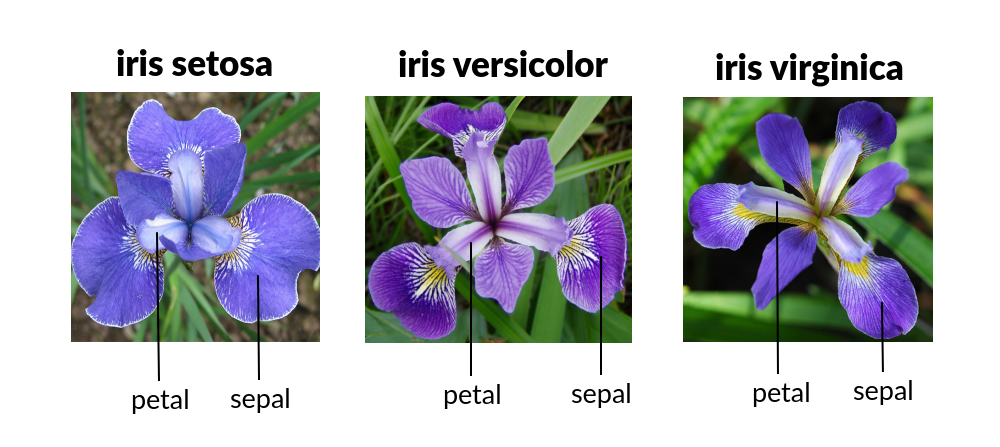

We will use the famous iris dataset to build a model that determines the specie of an iris flower based on
specifics measured properties that we call features (petal length, width, etc.) that will be used to train a machine learning model .

#The dataset contains: 3 classes (different Iris species) with 50 samples each, and then four numeric properties about those classes: Sepal Length, Sepal Width, Petal Length, and Petal Width.

The model we trained will be able to predict the species (the corrispondent class) for the new irises as we find them.

This is a supervised machine learning problem, because we already have measures about iris features for which we already know the species (so to say we already know the relationship between the input(s)=features measurement and the output=iris species).

The first step is to import all the libraries that we need .

In [54]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.multiclass import OneVsRestClassifier  
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import Binarizer, normalize, StandardScaler, MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## main steps of projects 


first: loading the Iris dataset
second: getting summary information about the data inside it
third: print dataset
fourth: import some useful python packages such as:

Scikit_Learn Library: As you know, machine learning uses a variety of methods, including supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning. The Scikit Learn library is suitable for implementing a range of supervised and unsupervised algorithms in Python.


#NumPy: working with multidimensional arrays

#SciPy: The basic library for scientific computing

#Matplotlib: Used to draw 2D and 3D diagrams

#IPython: An advanced interactive console for working with Python

#Sympy: Used to work with math symbols

#Pandas: Used to work with data structures and data analysis

#CiSciPy modules and plugins are commonly named Scikits; For this reason, the library provided for machine learning is also called Scikit Learn.

fifth:evaluation and apply clustering models

 
sixth: Classes are first performed on train data and then with the available test data, we run the modeled accuracy for evaluation. Finally, the accuracy of the classification and the clutter matrix are calculated.


loading the database and check the data inside it. 

Database contains 150 iris flowers with 4 different features that classify them into three clusters as follow:
- sepal length (cm),
- sepal width (cm),
- petal length (cm),
- petal width (cm)).

The target key contains values of either 0 1 or 2 encoding the species (so the class we assigned to a flower) es: the first flower specie is encoded by 0 it means it is a setosa, then we have versicolor ( class 1) and virginica(class 2).

How do i know it? because in the other key, that is target_names, the first element (so the zero term) is exactly setosa. 

So in target_names we will find the species names whose class corresponds to their idex in the array.

The other key that we see is DESCR that is simply a description of the dataset, so if we want to better see all the infos we can simply print iris.DESCR.


In [55]:
#checking the data in iris dataset
iris = load_iris()
#dimension of dataset (150,4) means 150 flowers with 4 features
print((iris.data).shape)
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)
print(iris.keys())
#here we associate x->the data and y-> corresponding class
X, Y = iris.data, iris.target
X=pd.DataFrame(data,columns=iris.feature_names)
data['species']=Y
data.head()

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.94

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Converting data into panda dataframe 
We can also load the dataset into a panda dataframe so to have a better visualization.

In [235]:
class_names = iris.target_names
D1 = pd.DataFrame(data= np.c_[iris['data'],iris['target']],columns= iris['feature_names'] + ['specie'])

D=dict(enumerate(iris.target_names))
D2 = {v: k for k, v in D.items()}
D1=D1.replace({"specie": D})
print(D1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        specie  
0       se

## Description of dataset
we use pandas and seaborn to plot the number of flowers for each species (about 50)and how many percent (33.33%)of each flower in our dataset and our clusters(here we show it with pie chart to have a general visualization about our dataset).

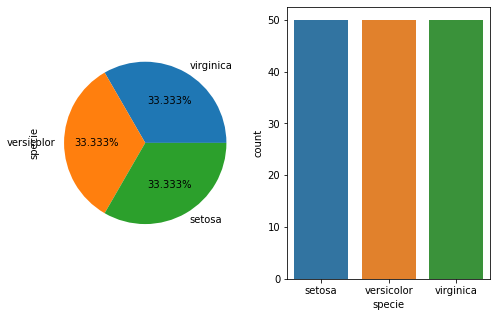

In [58]:
f,ax=plt.subplots(1,2,figsize=(8,5))
sns.countplot('specie',data=D1)
D1['specie'].value_counts().plot.pie(autopct='%0.3f%%',ax=ax[0])
plt.show()

Moreover we can use panda to discover the mean features values for each group (species):

In [254]:
#count the number of times a species exist in dataset
print(D1["specie"].value_counts())
#show the records only with a specific specie as "Iris-setosa".
print(D1.loc[D1["specie"] == 'setosa'].describe())
print(D1.loc[D1["specie"] == 'Virginica'].describe())
print(D1.loc[D1["specie"] == 'Versicolor'].describe())
#show the mean value of each species
D1.groupby("specie").mean() 


virginica     50
versicolor    50
setosa        50
Name: specie, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count                0.0             

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
specie,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Feature selection
In order to select the parmeters for machine learning and avoid overfittig, we studied the correlation between all the features, one of the methods that we use is pearson correlation. we use thsi mehtod to determine pairwise correlation of all the features of the dataset. It measures the strength of association between two measures petal length and width and the direction of the relationship.
The value of the correlation coefficient for pearson is between +1(strong positive correlation) and -1(strong negative correlation)

In [226]:
D1.corr(method='pearson') 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.063930,0.864439,0.797757
sepal width (cm),-0.063930,1.000000,-0.317002,-0.217676
petal length (cm),0.864439,-0.317002,1.000000,0.952053
petal width (cm),0.797757,-0.217676,0.952053,1.000000


Data Visualization


In [255]:
# box plots
df.plot(kind='box',subplots'True, layout=(3,2), figsize(8,12));


SyntaxError: EOL while scanning string literal (<ipython-input-255-2356b5e855b5>, line 2)

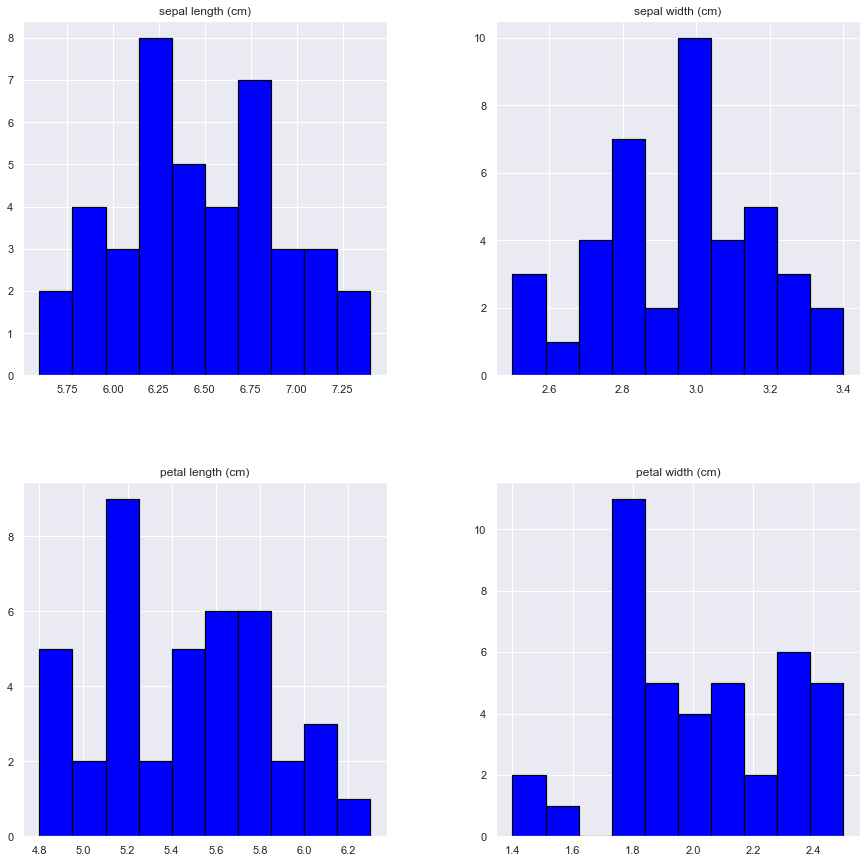

In [230]:
# See the distribution of data by histogram plot
df.hist(figsize=(15,15), color='blue',edgecolor='black', linewidth=1.2)
plt.show()


# correlation between features and target
### Pair plot 

This important step gives you various insights about the problem statement. In order to better visualize the the relationship between each feature we used a pairplot
( means for plotting here i plot all variables paired with all the other variables.)

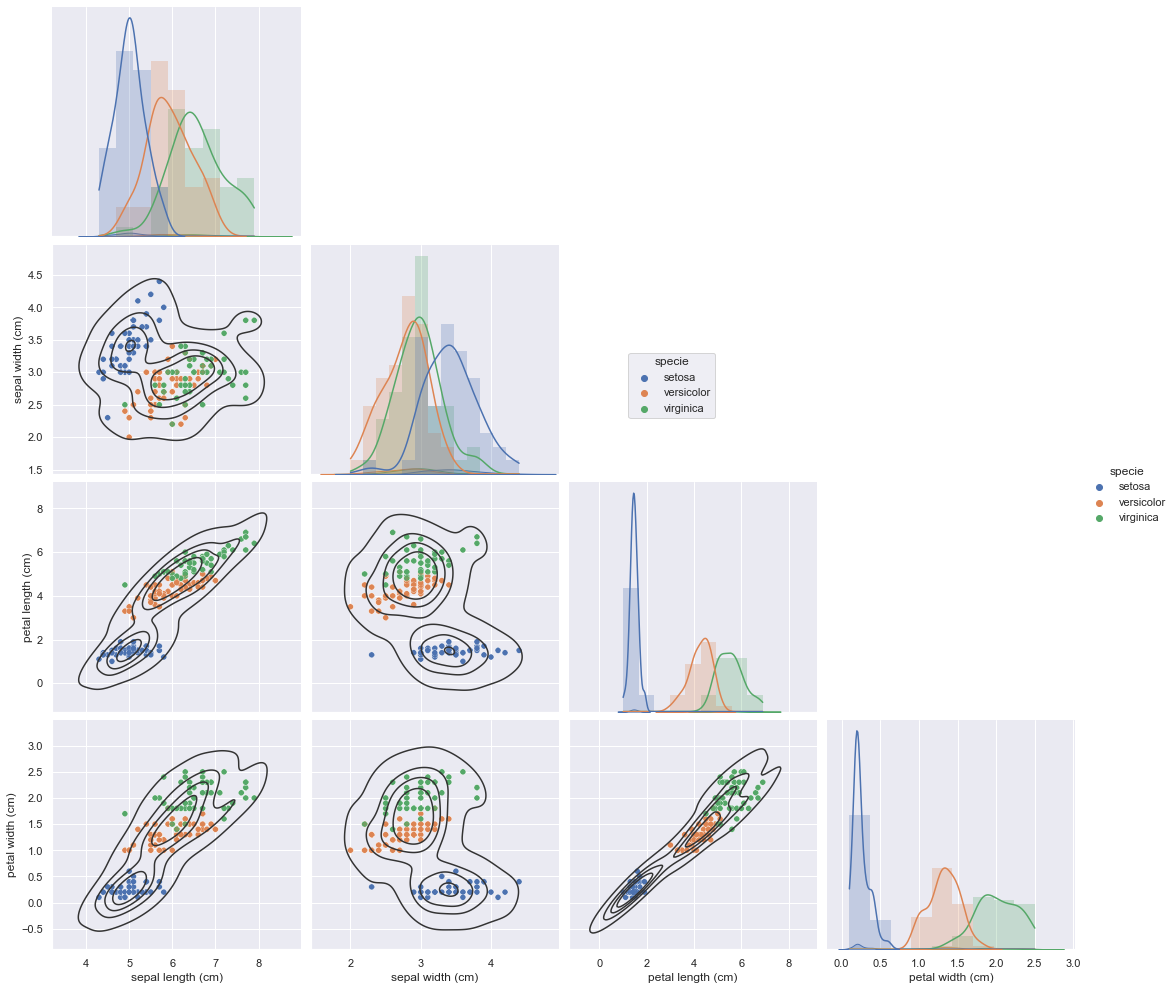

In [257]:

g=sns.pairplot(D1,hue='specie', height=3.5,corner=True);
g.map_lower(sns.kdeplot, hue=None, levels=5, color="0.2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
plt.show()

### Heat map 
one of the method to show the correlation between different features in the dataset is heat map diagram. in this map, positive value shows that the features have high correlation and negative values shows the negative correlation and relationship between variables(petal width and petal length)

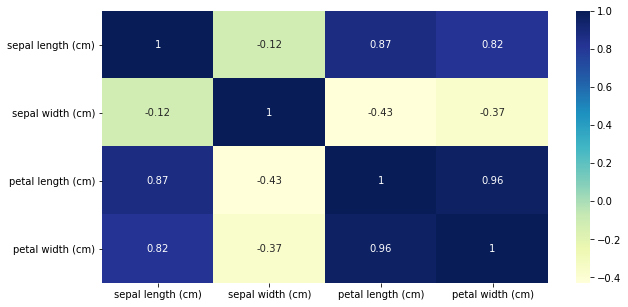

In [94]:
plt.figure(figsize=(10,5))
matrix = np.triu(D1.corr())
sns.heatmap(D1.corr(), annot=True,cmap='YlGnBu')
plt.show()  

## Plot OUTLIERS BY BOX PLOT
why plotting outliers in the result is very important? because some association maybe happen due to the presence of outlier, so for identifing outliers we should used the box plot. and after finding them we remove them from the dataset and then do our final analysing.

<function matplotlib.pyplot.show(close=None, block=None)>

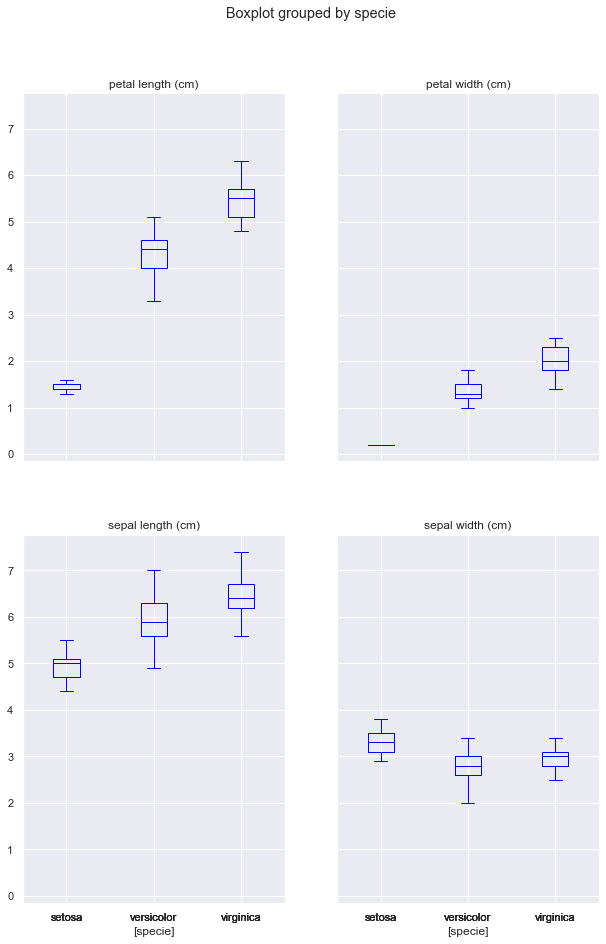

In [232]:
sns.set(style="darkgrid")

D1.boxplot( figsize=(10, 15),by='specie',color='blue')

c = [x for x in D1.columns if x != 'specie']
for flower in class_names:
    df = D1[(D1["specie"] == flower)]
    for feature in c:
        Q1 =  df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        delete=df[(df[feature] < Q1-1.5*IQR ) | (df[feature] > Q3+1.5*IQR)][feature]
        if len(delete) != 0:
            D1=D1.drop([delete.index[0]])
        
plt.show



## Swarm and Violin plot combined
Shows all observations along with some representation of the underlying distribution.

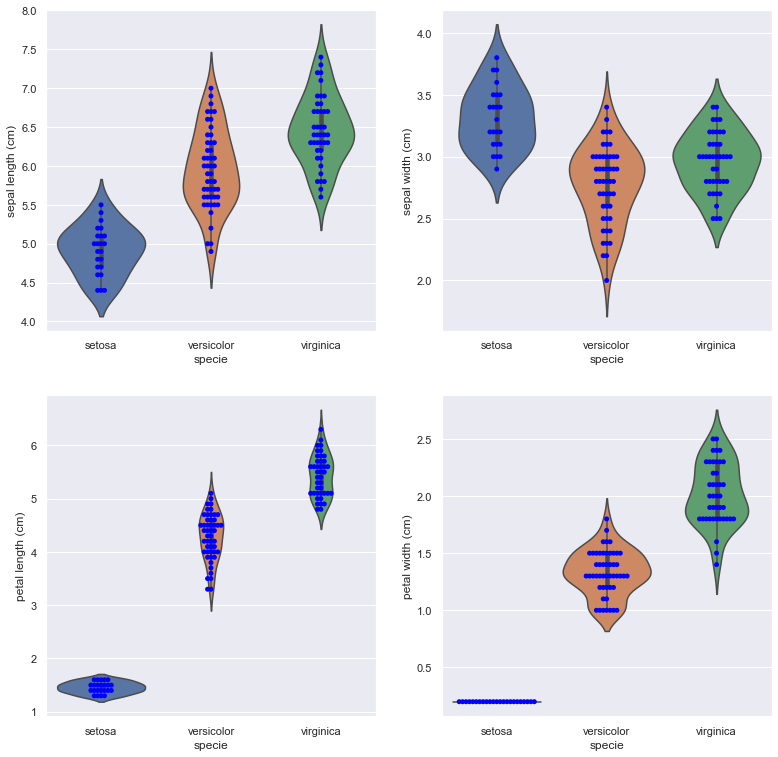

In [162]:
f,ax=plt.subplots(2,2,figsize=(20,20))
d={0:(0,0),1:(0,1),2:(1,0),3:(1,1)}
c = [x for x in D1.columns if x != 'specie']
for col in c:
    sns.violinplot(x="specie", y=col, data=D1,ax=ax[d[c.index(col)][0]][d[c.index(col)][1]])
    sns.swarmplot(x="specie", y= col, data=D1,color="blue", edgecolor="blue",ax=ax[d[c.index(col)][0]][d[c.index(col)][1]])
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.show()    


## dividing Dataset into training category and test category
However, effective machine learning (ML) algorithms require quality training and testing data — and often lots of it — to make accurate predictions. Different datasets serve different purposes in preparing an algorithm to make predictions and decisions based on real-world data.
Training data. This type of data builds up the machine learning algorithm. The data scientist feeds the algorithm input data, which corresponds to an expected output. The model evaluates the data repeatedly to learn more about the data’s behavior and then adjusts itself to serve its intended purpose.

Validation data. During training, validation data infuses new data into the model that it hasn’t evaluated before. Validation data provides the first test against unseen data, allowing data scientists to evaluate how well the model makes predictions based on the new data. Not all data scientists use validation data, but it can provide some helpful information to optimize hyperparameters, which influence how the model assesses data.
Test data. After the model is built, testing data once again validates that it can make accurate predictions. If training and validation data include labels to monitor performance metrics of the model, the testing data should be unlabeled. Test data provides a final, real-world check of an unseen dataset to confirm that the ML algorithm was trained effectively.
While each of these three datasets has its place in creating and training ML models, it’s easy to see some overlap between them. The difference between training data vs. test data is clear: one trains a model, the other confirms it works correctly, but confusion can pop up between the functional similarities and differences of other types of datasets.

Let’s further explore the differences between training data, validation data and testing data, and how to properly train an ML algorithm.
here i have calculated the performance of machine learing method correspond to 30% of the total dataset.
and before training we should first for check the class imbalances as follow:


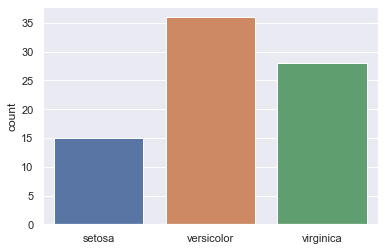

In [260]:
test_size = 0.3
      
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,test_size=test_size,random_state=42)
i = sns.countplot(Y_train)
i.set_xticklabels(list(D.values()))
plt.show()


## Resampling Procedeaure
A Gentle Introduction to Statistical Sampling and Resampling
by Jason Brownlee on June 13, 2018 in Statistics
Tweet Tweet  Share
Last Updated on August 8, 2019

Data is the currency of applied machine learning. Therefore, it is important that it is both collected and used effectively.

Data sampling refers to statistical methods for selecting observations from the domain with the objective of estimating a population parameter. Whereas data resampling refers to methods for economically using a collected dataset to improve the estimate of the population parameter and help to quantify the uncertainty of the estimate.

Both data sampling and data resampling are methods that are required in a predictive modeling problem.

In this tutorial, you will discover statistical sampling and statistical resampling methods for gathering and making best use of data.

After completing this tutorial, you will know:

Sampling is an active process of gathering observations with the intent of estimating a population variable.
Resampling is a methodology of economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter.
Resampling methods, in fact, make use of a nested resampling method.here is the methods that i have used for resampling:

- K-fold Cross-Validation,
- Leave One Out Cross-Validation,
- Shuffle Split Cross Validation.


In [261]:

cv_methods = []
seed = 7
test_size = 0.33
cv_methods.append(( 'k-fold'   , KFold(n_splits=5, random_state=seed,shuffle=True)))
cv_methods.append(( 'leave Out'  ,LeaveOneOut()))
cv_methods.append(( 'shuffle Split'  , ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)))

for name, method in cv_methods:
    kfold = method
    model = LogisticRegression(max_iter=100000,solver='lbfgs')
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    msg = "Accuracy mehthod %s with cv %.3f%% is st= %.3f%%" % (name,cv_results.mean()*100.0, cv_results.std()*100.0)
    print(msg)


Accuracy mehthod k-fold with cv 92.333% is st= 4.863%
Accuracy mehthod leave Out with cv 93.671% is st= 24.349%
Accuracy mehthod shuffle Split with cv 92.222% is st= 4.521%


## Feature Scaling
Machine learning algorithms like logistic regression use gradient descent as an optimization technique, therefore they require data to be scaled. 

Feature scaling and mean normalisation are indeed simple tricks to make GD run faster and converge with fewer iterations.

All the different machine learning algorithms has been tested for 4 different types of data:
- without processing,
- rescaled,
- standardized
- normalized data.

In [199]:
#preprare data
pre_processing=[('without processing', None)]
pre_processing.append(('normalize', Normalizer()))
pre_processing.append(('standard', StandardScaler()))
pre_processing.append(('rescale', MinMaxScaler(feature_range=(0, 1))))


## Classification Metrics
For classification problems,there e many ways of measuring classification performance.
We specifically computed:
- Classification Accuracy
- Logarithmic Loss

(While doing spot-checking in cross validation).


Once we selected the best machine learning algorithm (logistic regression performed without processing data) we computed more performance measurement (Area Under ROC, Curve Confusion Matrix and the Classification Report) on the test set.
classification algorithm
For Iris Dataset it is evident that Neural networkis the best classification method. Following Random Forest,CART and Logistic Regression were also precise with accuracy 0.973.

In [267]:
performance_metrix = ['accuracy','neg_log_loss']

For without processing data we produced:

             accuracy    neg_log_loss
Logistic  92.22±4.52     -23.62±5.22
Linear    95.93±3.08     -11.78±7.28
KNN         93.7±4.7    -49.65±56.43
decision  94.81±3.39  -179.09±117.24
gaussian   94.44±3.8     -11.51±6.42
SVM       87.78±7.42      -20.18±4.9 




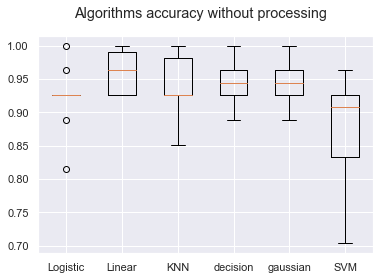

For normalize data we produced:

              accuracy    neg_log_loss
Logistic   45.19±14.8     -89.37±6.75
Linear     94.44±3.41    -19.81±11.67
KNN        94.81±2.96    -49.09±57.67
decision    88.52±5.6  -383.76±171.62
gaussian   95.56±3.63    -16.44±16.12
SVM       77.41±18.18     -20.83±6.62 




ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (12).

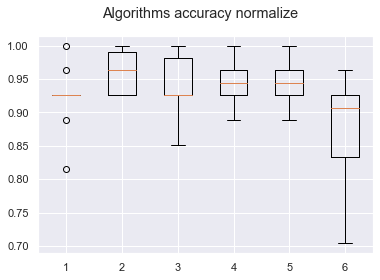

In [203]:
models = []
models.append(( 'Logistic'   , LogisticRegression(max_iter=10000)))
models.append(( 'Linear'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'decision' , DecisionTreeClassifier()))
models.append(( 'gaussian'   , GaussianNB()))
models.append(( 'SVM'  , SVC(probability=True)))
results = []
names = []
higher_acc=0
standard=0
best_model=''
for process in pre_processing:
    globals()['df_'+process[0]] = pd.DataFrame(index=None, columns=None)
    for algo in models:
        estimators = [process,algo]
        model = Pipeline(estimators)
        ss = ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
        names.append(algo[0])
        for scoring in performance_metrix:
            cv_results = cross_val_score(model, X_train, Y_train, cv=ss, scoring=scoring)
            globals()['df_'+process[0]].loc[algo[0],scoring]= '%s\u00B1%s'%(round(cv_results.mean()*100.0,2),round(cv_results.std()*100.0,2))
            if performance_metrix.index(scoring)==0:
                results.append(cv_results)
            if cv_results.mean()*100.0 > higher_acc:
                higher_acc=cv_results.mean()*100.0
                standard=cv_results.std()*100.0
                best_model=process[0], algo[0]
                
            elif cv_results.mean()*100.0 == higher_acc:
                if cv_results.std()*100.0 < standard:
                    higher_acc=cv_results.mean()*100.0
                    best_model=process[0], algo[0]        
    print('For %s data we produced:\n\n'%(process[0]),globals()['df_'+process[0]],'\n\n')
    fig = pyplot.figure()
    fig.suptitle('Algorithms accuracy %s'%(process[0]))
    ax = fig.add_subplot(111)
    pyplot.boxplot(results[:len(models)])
    ax.set_xticklabels(names)
    pyplot.show()
print("best performance for %s data, using %s algorithm. \nIt's Accuracy resulted to be %s with a standard deviation of %s" %(best_model[0],best_model[1],round(higher_acc,2),round(standard,2)))


## Classification results
gives representation of the main classification metrics .we should do evaluation of the best model (data without procecssing, using LR algorithm) on the test set and then fit our training test for it

In [204]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
report = classification_report(Y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        34
   macro avg       0.98      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



## Confusion matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model
is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made. It is this breakdown that overcomes the limitation of using classification accuracy alone.
and how we calcualte it?
What is a Confusion Matrix in Machine Learning
A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In this post, you will discover the confusion matrix for use in machine learning. After reading this post you will know:

What the confusion matrix is and why you need to use it.
How to calculate a confusion matrix for a 2-class classification problem from scratch.
How create a confusion matrix in Weka, Python and R.
Kick-start your project with my new book Machine Learning Algorithms From Scratch, including step-by-step tutorials and the Python source code files for all examples.

Classification Accuracy and its Limitations
Classification accuracy is the ratio of correct predictions to total predictions made.

classification accuracy = correct predictions / total predictions
It is often presented as a percentage by multiplying the result by 100.

classification accuracy = correct predictions / total predictions * 100
Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as:

error rate = (1 - (correct predictions / total predictions)) * 100
Classification accuracy is a great place to start, but often encounters problems in practice.

The main problem with classification accuracy is that it hides the detail you need to better understand the performance of your classification model. There are two examples where you are most likely to encounter this problem:

When your data has more than 2 classes. With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.
When your data does not have an even number of classes. You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value.
Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a confusion matrix.

What is a Confusion Matrix?
A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

It is this breakdown that overcomes the limitation of using classification accuracy alone.

Below is the process for calculating a confusion Matrix.

You need a test dataset or a validation dataset with expected outcome values.
Make a prediction for each row in your test dataset.
From the expected outcomes and predictions count:
The number of correct predictions for each class.
The number of incorrect predictions for each class, organized by the class that was predicted.
These numbers are then organized into a table, or a matrix as follows:

Expected down the side: Each row of the matrix corresponds to a predicted class.
Predicted across the top: Each column of the matrix corresponds to an actual class.
The counts of correct and incorrect classification are then filled into the table.

The total number of correct predictions for a class go into the expected row for that class value and the predicted column for that class value. In the same way, the total number of incorrect predictions for a class go into the expected row for that class value and the predicted column for that class value.


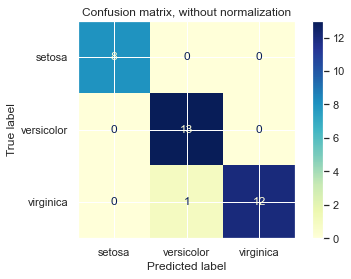

In [210]:
matrix = confusion_matrix(Y_test, pred)  
titles_options = [("Confusion matrix, not normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,display_labels=class_names,cmap='YlGnBu',normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

## ROC curve 
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

False Positive Rate (FPR) is defined as follows:

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC. To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

(Receiver Operating Characteristic) is a performance measurement for classification problem-
 On each axes is represented the sensibility (TPR= true positive rate) and the specificity (FPR= false positive rate).
The resulting curve shows immediately what is the dependency between these two measures in our data.
The model we generated is reliable if the AUC (area under the curve) is computed near 1.

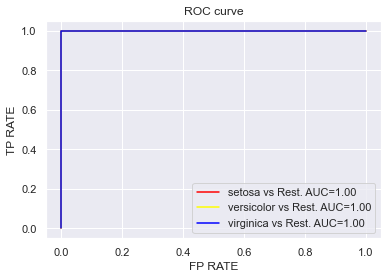

In [266]:
clf = OneVsRestClassifier(model)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
fpr = {}
tpr = {}
thresh ={}
roc_auc ={}
colors=['red', 'yellow', 'blue']
for i in range(len(class_names)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=colors[i], label='%s vs Rest. AUC=%.2f'%(class_names[i],roc_auc[i]))
plt.title('ROC curve')
plt.xlabel('FP RATE')
plt.ylabel('TP RATE')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


## Results
For Iris Dataset it is evident that Neural networkis the best classification method. Following Random Forest,CART and Logistic Regression were also precise with a very good overall prediction of 0.973 and the the best species that classify very well is setosa.
